1. We saw that the frequencies of word appearances follow a Zipf’s law. How about the
distribution of the lengths of the words (that is, the number of characters per word)?
How did you obtain that information (in R or in Python)? What can you say about the
shape of the distribution?
Please include a visualization of the distribution and a code snippet in your response.


    - The distrbituion of the lengths of words does indeed seem to follow Zipf's law. Where when plotting the log of frequency vs the log of length of words, we see a sharp drop as the log of length increases. This information was obtained by splitting the text by words, removing numbers and charachters, and getting the length. The frequency and the log of the frequency plots were then plotted. 
    
    Code & visualization can be found here:


2. How about the distribution of the tf-idf weights themselves? Does that follow Zipf’s law?
Please include in your response all of the following:
(1) a code snippet to obtain and visualize that distribution
(2) the resulting image
(3) your interpretation of what the distribution is like


3. How could you compute a similarity measure for documents based on the tf-idf matrix?
Please show a code snippet and discuss your proposal.


4. How could you compute a similarity measure for terms based on the tf-idf matrix?
Please show again a code snippet and discuss your proposal.


5. Please investigate state-of-the-art alternatives for LDA and provide here the DOI (if appli-
cable, URL if there is no related DOI) and a very brief critique of at least one alternative
that you consider promising.


6. Please carry out LDA or another topic-detection method of your choice on your data.
Include in your response the code snippet and a listing of how many tokens were asso-
ciated to each topic.

    - The code & vizs can be found here: 


7. Propose (either based on creativity alone or looking up alternatives) and implement an
alternative way to visualize the topics (other than the comparison cloud created in the
example code).
If you base your creation on some consulted sources, please clearly cite these sources in
your response. Also, as before, include a code snippet and an image of the resulting
visualization.

    - The code & vizs can be found here: 

8. How would you go about using tf-idf to build a list of stop words from scratch when none
is available? Are there any language-specific concerns in the approach you are envisioning?
Your response may either be fully conceptual (pseudo-code is encouraged) or include a
code snippet in R or Python. Again, please clearly cite sources if you consulted any.


9. Based on both your own experience thus far and on what you have encountered until
know or can scrape up online just to answer this question, what do you perceive to be the
strengths and weaknesses of Python and R as NLP tools in particular?
Are you aware of any other tools that would be competitive for NLP tasks at present?


# Code

## Question 1

In [1]:
# Importing the BBC News dataset
import numpy as np
import pandas as pd

df = pd.read_csv('bbc-news-data.csv', sep='\t')

# The df is split into four columns, where each row is an article. 
df.head()

,category,filename,title,content
0,business,001.txt,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarne...
1,business,002.txt,Dollar gains on Greenspan speech,The dollar has hit its highest level against ...
2,business,003.txt,Yukos unit buyer faces loan claim,The owners of embattled Russian oil giant Yuk...
3,business,004.txt,High fuel prices hit BA's profits,British Airways has blamed high fuel prices f...
4,business,005.txt,Pernod takeover talk lifts Domecq,Shares in UK drinks and food firm Allied Dome...


In [4]:
# Splitting the dataset into words 
import nltk
df["word"] = df["content"].apply(lambda x: nltk.word_tokenize(x))

In [6]:
#Taking a look

df.head()

,category,filename,title,content,word
0,business,001.txt,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarne...,"[Quarterly, profits, at, US, media, giant, Tim..."
1,business,002.txt,Dollar gains on Greenspan speech,The dollar has hit its highest level against ...,"[The, dollar, has, hit, its, highest, level, a..."
2,business,003.txt,Yukos unit buyer faces loan claim,The owners of embattled Russian oil giant Yuk...,"[The, owners, of, embattled, Russian, oil, gia..."
3,business,004.txt,High fuel prices hit BA's profits,British Airways has blamed high fuel prices f...,"[British, Airways, has, blamed, high, fuel, pr..."
4,business,005.txt,Pernod takeover talk lifts Domecq,Shares in UK drinks and food firm Allied Dome...,"[Shares, in, UK, drinks, and, food, firm, Alli..."


In [7]:
#Exploding the DF by the new paragraph column instead of by text

df = df.explode("word", ignore_index=True)
df.rename(columns={"Unnamed: 0": "wordid"}, inplace=True)
df.index.name = "wordid"
df

,category,filename,title,content,word
wordid,,,,,
0,business,001.txt,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarne...,Quarterly
1,business,001.txt,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarne...,profits
2,business,001.txt,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarne...,at
3,business,001.txt,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarne...,US
4,business,001.txt,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarne...,media
...,...,...,...,...,...
963058,tech,401.txt,Losing yourself in online gaming,"Online role playing games are time-consuming,...",was
963059,tech,401.txt,Losing yourself in online gaming,"Online role playing games are time-consuming,...",the
963060,tech,401.txt,Losing yourself in online gaming,"Online role playing games are time-consuming,...",days


In [12]:
# Removing Charchters & just keeping words
df["is_alpha"] = df["word"].apply(lambda x: x.isalpha())
df

,category,filename,title,content,word,is_alpha
wordid,,,,,,
0,business,001.txt,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarne...,Quarterly,True
1,business,001.txt,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarne...,profits,True
2,business,001.txt,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarne...,at,True
3,business,001.txt,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarne...,US,True
4,business,001.txt,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarne...,media,True
...,...,...,...,...,...,...
963058,tech,401.txt,Losing yourself in online gaming,"Online role playing games are time-consuming,...",was,True
963059,tech,401.txt,Losing yourself in online gaming,"Online role playing games are time-consuming,...",the,True
963060,tech,401.txt,Losing yourself in online gaming,"Online role playing games are time-consuming,...",days,True


In [17]:
# Filter to only keep words

df_w = df[df['is_alpha']==True]
df_w

,category,filename,title,content,word,is_alpha
wordid,,,,,,
0,business,001.txt,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarne...,Quarterly,True
1,business,001.txt,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarne...,profits,True
2,business,001.txt,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarne...,at,True
3,business,001.txt,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarne...,US,True
4,business,001.txt,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarne...,media,True
...,...,...,...,...,...,...
963057,tech,401.txt,Losing yourself in online gaming,"Online role playing games are time-consuming,...",them,True
963058,tech,401.txt,Losing yourself in online gaming,"Online role playing games are time-consuming,...",was,True
963059,tech,401.txt,Losing yourself in online gaming,"Online role playing games are time-consuming,...",the,True


In [20]:
# Count letters in word
df_w["letter_count"] = df_w["word"].apply(lambda x: len(x))
df_w

C:\Users\alrab\AppData\Local\Temp\ipykernel_26372\2743127639.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_w["letter_count"] = df_w["word"].apply(lambda x: len(x))


,category,filename,title,content,word,is_alpha,letter_count
wordid,,,,,,,
0,business,001.txt,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarne...,Quarterly,True,9
1,business,001.txt,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarne...,profits,True,7
2,business,001.txt,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarne...,at,True,2
3,business,001.txt,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarne...,US,True,2
4,business,001.txt,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarne...,media,True,5
...,...,...,...,...,...,...,...
963057,tech,401.txt,Losing yourself in online gaming,"Online role playing games are time-consuming,...",them,True,4
963058,tech,401.txt,Losing yourself in online gaming,"Online role playing games are time-consuming,...",was,True,3
963059,tech,401.txt,Losing yourself in online gaming,"Online role playing games are time-consuming,...",the,True,3


<AxesSubplot:xlabel='letter_count', ylabel='Frequency'>

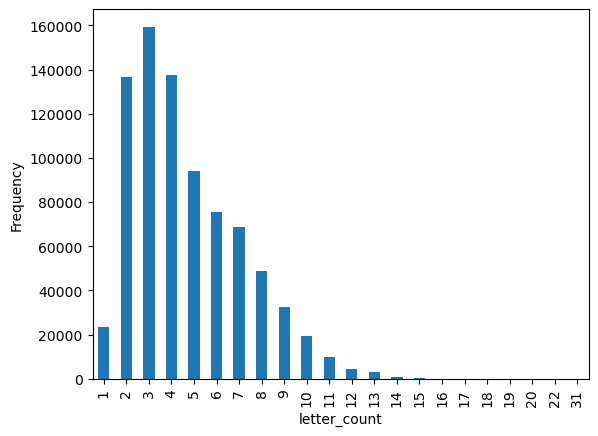

In [104]:
# Plotting word frequency by 
# This is our visual library
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
plt.xlabel('letter_count')
plt.ylabel('Frequency')
df_w['letter_count'].value_counts().sort_index().plot(ax=ax, kind='bar')

In [105]:
# Taking the log of letter_count & frequency
df_counts = df_w['letter_count'].value_counts().to_frame()
df_counts = df_counts.reset_index(level=0)
df_counts.sort_values('index')
df_counts['log_count'] = df_counts["index"].apply(lambda x: math.log(x))
df_counts['log_freq'] = df_counts["letter_count"].apply(lambda x: math.log(x))
df_counts

,index,letter_count,log_count,log_freq
0,3,159350,1.098612,11.978858
1,4,137483,1.386294,11.831256
2,2,136853,0.693147,11.826663
3,5,94300,1.609438,11.454236
4,6,75707,1.791759,11.234626
5,7,68852,1.945910,11.139715
6,8,48789,2.079442,10.795260
7,9,32732,2.197225,10.396108
8,1,23301,0.000000,10.056252
9,10,19267,2.302585,9.866149


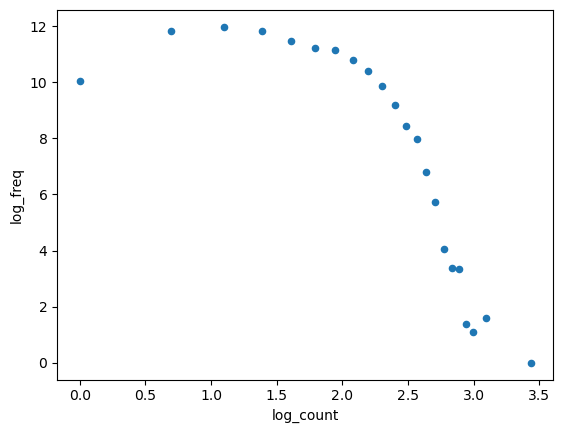

In [111]:
# Plotting the logs 
df_counts.plot.scatter(x="log_count", y="log_freq")
plt.show()


The distrbituion of the lengths of words does indeed seem to follow Zipf's law. 
Where when plotting the log of frequency vs the log of length of words, we see a sharp drop as the log of length increases. 

This information was obtained by splitting the text by words, removing numbers and charachters, and getting the length. The frequency and the log of the frequency plots were then plotted. 

## Question 2

In [226]:
# Obtain the TF-IDF Weights
from sklearn.feature_extraction.text import TfidfVectorizer

df_raw = pd.read_csv('bbc-news-data.csv', sep='\t')
#Remove digits, we have 2224 articles
vectorizer = TfidfVectorizer(token_pattern=r"\b[^\d\W]+", stop_words = 'english', strip_accents='ascii')
tf_idf = vectorizer.fit_transform(df_raw["content"])

In [227]:
#Saving results in a DF
df_tfidf = pd.DataFrame(tf_idf.toarray(), columns=vectorizer.get_feature_names_out())
df_tfidf = df_tfidf.reset_index(level=0)

df_tfidf_melt = pd.melt(df_tfidf, id_vars=['level_0'], var_name='word', value_name='tf_idf')


In [228]:
df_tfidf_melt

,level_0,word,tf_idf
0,0,aa,0.0
1,1,aa,0.0
2,2,aa,0.0
3,3,aa,0.0
4,4,aa,0.0
...,...,...,...
61078470,2220,zvyagintsev,0.0
61078471,2221,zvyagintsev,0.0
61078472,2222,zvyagintsev,0.0
61078473,2223,zvyagintsev,0.0


## Question 3

Since the articles here are composed of words, the similarity between these words can be used to create a similarity measure between the articles or documents.

Basically, we can calculate the distance between clusters (which would represent the documents) in order to calculate how similar the documents are to each other. Those that are close together would be thus more similar. 

## Question 4

By somehow aggregating the meaning of the term ?


,category,filename,title,content,word,is_alpha,letter_count
wordid,,,,,,,
0,business,001.txt,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarne...,Quarterly,True,9
1,business,001.txt,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarne...,profits,True,7
2,business,001.txt,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarne...,at,True,2
3,business,001.txt,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarne...,US,True,2
4,business,001.txt,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarne...,media,True,5
...,...,...,...,...,...,...,...
963057,tech,401.txt,Losing yourself in online gaming,"Online role playing games are time-consuming,...",them,True,4
963058,tech,401.txt,Losing yourself in online gaming,"Online role playing games are time-consuming,...",was,True,3
963059,tech,401.txt,Losing yourself in online gaming,"Online role playing games are time-consuming,...",the,True,3


## Question 6

In [265]:
# Raw data

df_raw = pd.read_csv('bbc-news-data.csv', sep='\t')
df_raw

,category,filename,title,content
0,business,001.txt,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarne...
1,business,002.txt,Dollar gains on Greenspan speech,The dollar has hit its highest level against ...
2,business,003.txt,Yukos unit buyer faces loan claim,The owners of embattled Russian oil giant Yuk...
3,business,004.txt,High fuel prices hit BA's profits,British Airways has blamed high fuel prices f...
4,business,005.txt,Pernod takeover talk lifts Domecq,Shares in UK drinks and food firm Allied Dome...
...,...,...,...,...
2220,tech,397.txt,BT program to beat dialler scams,BT is introducing two initiatives to help bea...
2221,tech,398.txt,Spam e-mails tempt net shoppers,Computer users across the world continue to i...
2222,tech,399.txt,Be careful how you code,A new European directive could put software w...
2223,tech,400.txt,US cyber security chief resigns,The man making sure US computer networks are ...


In [266]:
# Remove the uneeded columns
df_articles = df_raw.drop(columns=['filename', 'title'], axis=1)
df_articles

,category,content
0,business,Quarterly profits at US media giant TimeWarne...
1,business,The dollar has hit its highest level against ...
2,business,The owners of embattled Russian oil giant Yuk...
3,business,British Airways has blamed high fuel prices f...
4,business,Shares in UK drinks and food firm Allied Dome...
...,...,...
2220,tech,BT is introducing two initiatives to help bea...
2221,tech,Computer users across the world continue to i...
2222,tech,A new European directive could put software w...
2223,tech,The man making sure US computer networks are ...


In [267]:
# Load the regular expression library to filter out what's not needed
import re
# Remove punctuation
df_articles['content_processed'] = \
df_articles['content'].map(lambda x: re.sub('[,\.!?]', '', x))
# Convert to lowercase
df_articles['content_processed'] = \
df_articles['content_processed'].map(lambda x: x.lower())

df_articles

,category,content,content_processed
0,business,Quarterly profits at US media giant TimeWarne...,quarterly profits at us media giant timewarne...
1,business,The dollar has hit its highest level against ...,the dollar has hit its highest level against ...
2,business,The owners of embattled Russian oil giant Yuk...,the owners of embattled russian oil giant yuk...
3,business,British Airways has blamed high fuel prices f...,british airways has blamed high fuel prices f...
4,business,Shares in UK drinks and food firm Allied Dome...,shares in uk drinks and food firm allied dome...
...,...,...,...
2220,tech,BT is introducing two initiatives to help bea...,bt is introducing two initiatives to help bea...
2221,tech,Computer users across the world continue to i...,computer users across the world continue to i...
2222,tech,A new European directive could put software w...,a new european directive could put software w...
2223,tech,The man making sure US computer networks are ...,the man making sure us computer networks are ...


In [268]:
df_articles.loc[500, 'content_processed']

' a conflict between the argentine state and water firm aguas argentinas controlled by france\'s suez is casting doubt on the firm\'s future  the firm which serves the province of buenos aires wants a tariff rise of 60% to fund water-supply improvements the government has rejected the 60% rise and wants aguas argentinas to make an annual investment of 400m pesos ($136m; £723m) in improvements planning minister julio de vido has offered state help but not for "free"  mr de vido said that the argentine state would not make a contribution "in the form of a subsidy"  he has said a contribution could be made in return for a seat on the company\'s board he added that the government is in discussions with aguas argentinas about what role it might take in the event that a state contribution is agreed however aguas argentinas told the argentine newspaper clarin it would not accept any change to its legal structure and in practice this rules out state participation on its board the planning mini

In [298]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
stop_words.extend(["people", "people", "year", "government", "labour", "told", "film", "time", "bbc", "years", "0o", "0s", "3a", "3b", "3d", "6b", "6o", "a", "a1", "a2", "a3", "a4", "ab", "able", "about", "above", "abst", "ac", "accordance", "according", "accordingly", "across", "act", "actually", "ad", "added", "adj", "ae", "af", "affected", "affecting", "affects", "after", "afterwards", "ag", "again", "against", "ah", "ain", "ain't", "aj", "al", "all", "allow", "allows", "almost", "alone", "along", "already", "also", "although", "always", "am", "among", "amongst", "amoungst", "amount", "an", "and", "announce", "another", "any", "anybody", "anyhow", "anymore", "anyone", "anything", "anyway", "anyways", "anywhere", "ao", "ap", "apart", "apparently", "appear", "appreciate", "appropriate", "approximately", "ar", "are", "aren", "arent", "aren't", "arise", "around", "as", "a's", "aside", "ask", "asking", "associated", "at", "au", "auth", "av", "available", "aw", "away", "awfully", "ax", "ay", "az", "b", "b1", "b2", "b3", "ba", "back", "bc", "bd", "be", "became", "because", "become", "becomes", "becoming", "been", "before", "beforehand", "begin", "beginning", "beginnings", "begins", "behind", "being", "believe", "below", "beside", "besides", "best", "better", "between", "beyond", "bi", "bill", "biol", "bj", "bk", "bl", "bn", "both", "bottom", "bp", "br", "brief", "briefly", "bs", "bt", "bu", "but", "bx", "by", "c", "c1", "c2", "c3", "ca", "call", "came", "can", "cannot", "cant", "can't", "cause", "causes", "cc", "cd", "ce", "certain", "certainly", "cf", "cg", "ch", "changes", "ci", "cit", "cj", "cl", "clearly", "cm", "c'mon", "cn", "co", "com", "come", "comes", "con", "concerning", "consequently", "consider", "considering", "contain", "containing", "contains", "corresponding", "could", "couldn", "couldnt", "couldn't", "course", "cp", "cq", "cr", "cry", "cs", "c's", "ct", "cu", "currently", "cv", "cx", "cy", "cz", "d", "d2", "da", "date", "dc", "dd", "de", "definitely", "describe", "described", "despite", "detail", "df", "di", "did", "didn", "didn't", "different", "dj", "dk", "dl", "do", "does", "doesn", "doesn't", "doing", "don", "done", "don't", "down", "downwards", "dp", "dr", "ds", "dt", "du", "due", "during", "dx", "dy", "e", "e2", "e3", "ea", "each", "ec", "ed", "edu", "ee", "ef", "effect", "eg", "ei", "eight", "eighty", "either", "ej", "el", "eleven", "else", "elsewhere", "em", "empty", "en", "end", "ending", "enough", "entirely", "eo", "ep", "eq", "er", "es", "especially", "est", "et", "et-al", "etc", "eu", "ev", "even", "ever", "every", "everybody", "everyone", "everything", "everywhere", "ex", "exactly", "example", "except", "ey", "f", "f2", "fa", "far", "fc", "few", "ff", "fi", "fifteen", "fifth", "fify", "fill", "find", "fire", "first", "five", "fix", "fj", "fl", "fn", "fo", "followed", "following", "follows", "for", "former", "formerly", "forth", "forty", "found", "four", "fr", "from", "front", "fs", "ft", "fu", "full", "further", "furthermore", "fy", "g", "ga", "gave", "ge", "get", "gets", "getting", "gi", "give", "given", "gives", "giving", "gj", "gl", "go", "goes", "going", "gone", "got", "gotten", "gr", "greetings", "gs", "gy", "h", "h2", "h3", "had", "hadn", "hadn't", "happens", "hardly", "has", "hasn", "hasnt", "hasn't", "have", "haven", "haven't", "having", "he", "hed", "he'd", "he'll", "hello", "help", "hence", "her", "here", "hereafter", "hereby", "herein", "heres", "here's", "hereupon", "hers", "herself", "hes", "he's", "hh", "hi", "hid", "him", "himself", "his", "hither", "hj", "ho", "home", "hopefully", "how", "howbeit", "however", "how's", "hr", "hs", "http", "hu", "hundred", "hy", "i", "i2", "i3", "i4", "i6", "i7", "i8", "ia", "ib", "ibid", "ic", "id", "i'd", "ie", "if", "ig", "ignored", "ih", "ii", "ij", "il", "i'll", "im", "i'm", "immediate", "immediately", "importance", "important", "in", "inasmuch", "inc", "indeed", "index", "indicate", "indicated", "indicates", "information", "inner", "insofar", "instead", "interest", "into", "invention", "inward", "io", "ip", "iq", "ir", "is", "isn", "isn't", "it", "itd", "it'd", "it'll", "its", "it's", "itself", "iv", "i've", "ix", "iy", "iz", "j", "jj", "jr", "js", "jt", "ju", "just", "k", "ke", "keep", "keeps", "kept", "kg", "kj", "km", "know", "known", "knows", "ko", "l", "l2", "la", "largely", "last", "lately", "later", "latter", "latterly", "lb", "lc", "le", "least", "les", "less", "lest", "let", "lets", "let's", "lf", "like", "liked", "likely", "line", "little", "lj", "ll", "ll", "ln", "lo", "look", "looking", "looks", "los", "lr", "ls", "lt", "ltd", "m", "m2", "ma", "made", "mainly", "make", "makes", "many", "may", "maybe", "me", "mean", "means", "meantime", "meanwhile", "merely", "mg", "might", "mightn", "mightn't", "mill", "million", "mine", "miss", "ml", "mn", "mo", "more", "moreover", "most", "mostly", "move", "mr", "mrs", "ms", "mt", "mu", "much", "mug", "must", "mustn", "mustn't", "my", "myself", "n", "n2", "na", "name", "namely", "nay", "nc", "nd", "ne", "near", "nearly", "necessarily", "necessary", "need", "needn", "needn't", "needs", "neither", "never", "nevertheless", "new", "next", "ng", "ni", "nine", "ninety", "nj", "nl", "nn", "no", "nobody", "non", "none", "nonetheless", "noone", "nor", "normally", "nos", "not", "noted", "nothing", "novel", "now", "nowhere", "nr", "ns", "nt", "ny", "o", "oa", "ob", "obtain", "obtained", "obviously", "oc", "od", "of", "off", "often", "og", "oh", "oi", "oj", "ok", "okay", "ol", "old", "om", "omitted", "on", "once", "one", "ones", "only", "onto", "oo", "op", "oq", "or", "ord", "os", "ot", "other", "others", "otherwise", "ou", "ought", "our", "ours", "ourselves", "out", "outside", "over", "overall", "ow", "owing", "own", "ox", "oz", "p", "p1", "p2", "p3", "page", "pagecount", "pages", "par", "part", "particular", "particularly", "pas", "past", "pc", "pd", "pe", "per", "perhaps", "pf", "ph", "pi", "pj", "pk", "pl", "placed", "please", "plus", "pm", "pn", "po", "poorly", "possible", "possibly", "potentially", "pp", "pq", "pr", "predominantly", "present", "presumably", "previously", "primarily", "probably", "promptly", "proud", "provides", "ps", "pt", "pu", "put", "py", "q", "qj", "qu", "que", "quickly", "quite", "qv", "r", "r2", "ra", "ran", "rather", "rc", "rd", "re", "readily", "really", "reasonably", "recent", "recently", "ref", "refs", "regarding", "regardless", "regards", "related", "relatively", "research", "research-articl", "respectively", "resulted", "resulting", "results", "rf", "rh", "ri", "right", "rj", "rl", "rm", "rn", "ro", "rq", "rr", "rs", "rt", "ru", "run", "rv", "ry", "s", "s2", "sa", "said", "same", "saw", "say", "saying", "says", "sc", "sd", "se", "sec", "second", "secondly", "section", "see", "seeing", "seem", "seemed", "seeming", "seems", "seen", "self", "selves", "sensible", "sent", "serious", "seriously", "seven", "several", "sf", "shall", "shan", "shan't", "she", "shed", "she'd", "she'll", "shes", "she's", "should", "shouldn", "shouldn't", "should've", "show", "showed", "shown", "showns", "shows", "si", "side", "significant", "significantly", "similar", "similarly", "since", "sincere", "six", "sixty", "sj", "sl", "slightly", "sm", "sn", "so", "some", "somebody", "somehow", "someone", "somethan", "something", "sometime", "sometimes", "somewhat", "somewhere", "soon", "sorry", "sp", "specifically", "specified", "specify", "specifying", "sq", "sr", "ss", "st", "still", "stop", "strongly", "sub", "substantially", "successfully", "such", "sufficiently", "suggest", "sup", "sure", "sy", "system", "sz", "t", "t1", "t2", "t3", "take", "taken", "taking", "tb", "tc", "td", "te", "tell", "ten", "tends", "tf", "th", "than", "thank", "thanks", "thanx", "that", "that'll", "thats", "that's", "that've", "the", "their", "theirs", "them", "themselves", "then", "thence", "there", "thereafter", "thereby", "thered", "therefore", "therein", "there'll", "thereof", "therere", "theres", "there's", "thereto", "thereupon", "there've", "these", "they", "theyd", "they'd", "they'll", "theyre", "they're", "they've", "thickv", "thin", "think", "third", "this", "thorough", "thoroughly", "those", "thou", "though", "thoughh", "thousand", "three", "throug", "through", "throughout", "thru", "thus", "ti", "til", "tip", "tj", "tl", "tm", "tn", "to", "together", "too", "took", "top", "toward", "towards", "tp", "tq", "tr", "tried", "tries", "truly", "try", "trying", "ts", "t's", "tt", "tv", "twelve", "twenty", "twice", "two", "tx", "u", "u201d", "ue", "ui", "uj", "uk", "um", "un", "under", "unfortunately", "unless", "unlike", "unlikely", "until", "unto", "uo", "up", "upon", "ups", "ur", "us", "use", "used", "useful", "usefully", "usefulness", "uses", "using", "usually", "ut", "v", "va", "value", "various", "vd", "ve", "ve", "very", "via", "viz", "vj", "vo", "vol", "vols", "volumtype", "vq", "vs", "vt", "vu", "w", "wa", "want", "wants", "was", "wasn", "wasnt", "wasn't", "way", "we", "wed", "we'd", "welcome", "well", "we'll", "well-b", "went", "were", "we're", "weren", "werent", "weren't", "we've", "what", "whatever", "what'll", "whats", "what's", "when", "whence", "whenever", "when's", "where", "whereafter", "whereas", "whereby", "wherein", "wheres", "where's", "whereupon", "wherever", "whether", "which", "while", "whim", "whither", "who", "whod", "whoever", "whole", "who'll", "whom", "whomever", "whos", "who's", "whose", "why", "why's", "wi", "widely", "will", "willing", "wish", "with", "within", "without", "wo", "won", "wonder", "wont", "won't", "words", "world", "would", "wouldn", "wouldnt", "wouldn't", "www", "x", "x1", "x2", "x3", "xf", "xi", "xj", "xk", "xl", "xn", "xo", "xs", "xt", "xv", "xx", "y", "y2", "yes", "yet", "yj", "yl", "you", "youd", "you'd", "you'll", "your", "youre", "you're", "yours", "yourself", "yourselves", "you've", "yr", "ys", "yt", "z", "zero", "zi", "zz"])

def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

        
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]

data = df_articles.content_processed.values.tolist()
data_words = list(sent_to_words(data))
# remove stop words
data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30])

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\alrab\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['quarterly', 'profits', 'media', 'giant', 'timewarner', 'jumped', 'months', 'december', 'earlier', 'firm', 'biggest', 'investors', 'google', 'benefited', 'sales', 'high', 'speed', 'internet', 'connections', 'higher', 'advert', 'sales', 'timewarner', 'fourth', 'quarter', 'sales', 'rose', 'profits', 'buoyed', 'gains']


In [299]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

[(0, 2), (1, 1), (2, 1), (3, 2), (4, 1), (5, 1), (6, 7), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 2), (24, 1), (25, 1), (26, 1), (27, 2), (28, 2), (29, 1)]


In [300]:
from pprint import pprint
# number of topics
num_topics = 5
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics,
                                       random_state=100,
                                       iterations=1000
                                      )
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.005*"music" + 0.003*"market" + 0.002*"number" + 0.002*"win" + 0.002*"set" '
  '+ 0.002*"good" + 0.002*"games" + 0.002*"european" + 0.002*"mobile" + '
  '0.002*"digital"'),
 (1,
  '0.005*"game" + 0.003*"games" + 0.002*"set" + 0.002*"party" + 0.002*"number" '
  '+ 0.002*"british" + 0.002*"win" + 0.002*"england" + 0.002*"week" + '
  '0.002*"wales"'),
 (2,
  '0.003*"company" + 0.002*"yukos" + 0.002*"open" + 0.002*"firm" + '
  '0.002*"players" + 0.002*"number" + 0.002*"court" + 0.002*"companies" + '
  '0.002*"game" + 0.002*"group"'),
 (3,
  '0.003*"election" + 0.003*"brown" + 0.003*"blair" + 0.002*"public" + '
  '0.002*"minister" + 0.002*"party" + 0.002*"england" + 0.002*"work" + '
  '0.002*"news" + 0.002*"company"'),
 (4,
  '0.002*"company" + 0.002*"high" + 0.002*"bank" + 0.002*"sales" + 0.002*"set" '
  '+ 0.002*"report" + 0.002*"mobile" + 0.002*"technology" + 0.002*"music" + '
  '0.002*"country"')]


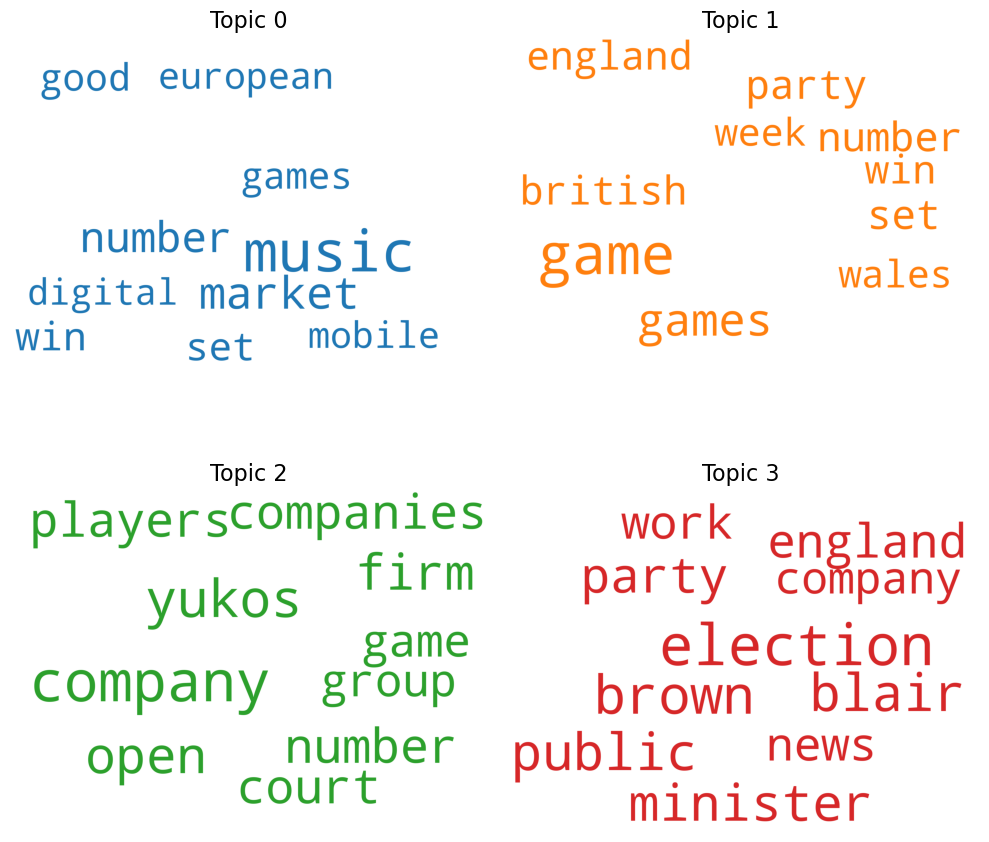

In [301]:
# Wordcloud of Top N words in each topic
# Im looking for something close to  (business, entertainment, politics, sport, tech).
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

## Question 6 & 7 (Showcasing new viz)

C:\Users\alrab\AppData\Local\Temp\ipykernel_26372\2773411210.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
C:\Users\alrab\AppData\Local\Temp\ipykernel_26372\2773411210.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
C:\Users\alrab\AppData\Local\Temp\ipykernel_26372\2773411210.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
C:\Users\alrab\AppData\Local\Temp\ipykernel_26372\2773411210.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')


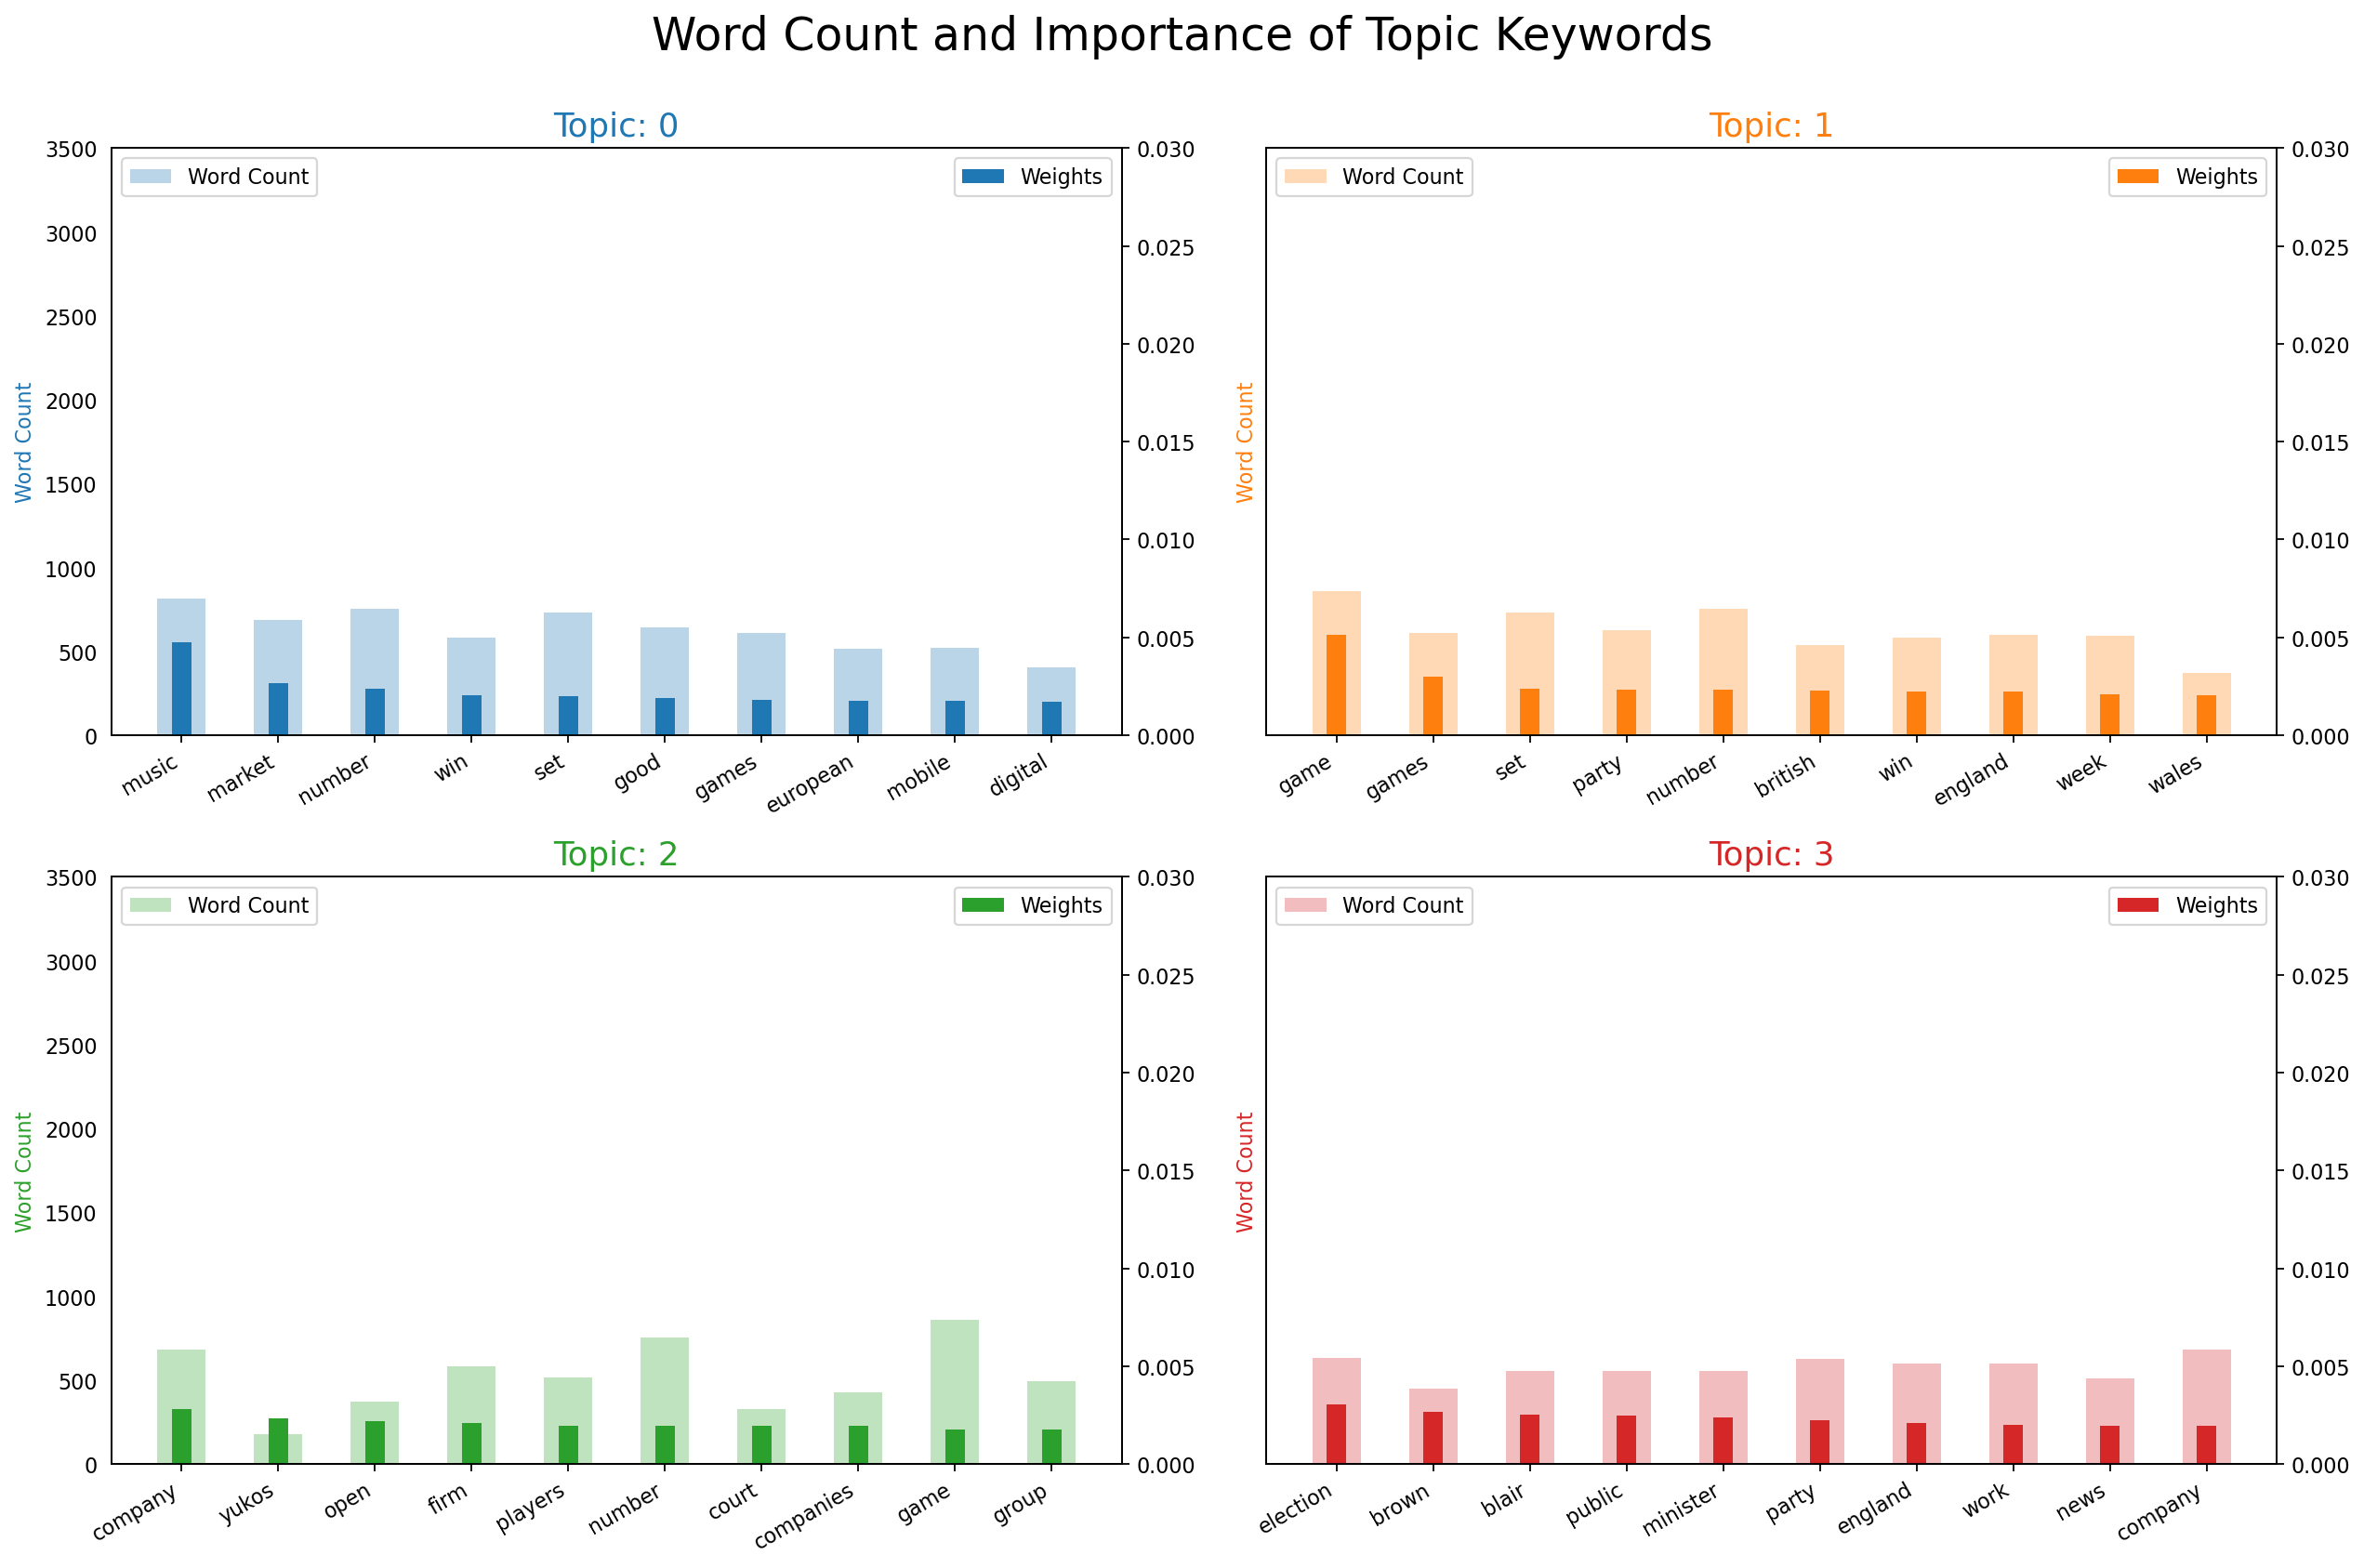

In [302]:
from collections import Counter
topics = lda_model.show_topics(formatted=False)
data_flat = [w for w_list in data_words for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(2, 2, figsize=(16,10), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 3500)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
plt.show()